In [ ]:
##Overall train and val model
import pandas as pd
import numpy as np
import os.path as op

IMAGE_WIDTH = {5: 15, 20: 60, 60: 180}
IMAGE_HEIGHT = {5: 32, 20: 64, 60: 96}
date_spread = 20
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import os
from sklearn.model_selection import train_test_split
os.environ["CUDA_VISIBLE_DEVICES"] = "1"



'''
class CNN_20D(nn.Module):

    def __init__(self):
        super(CNN_20D, self).__init__()
        self.cnn_block1 = CNN_Block(in_channels=1, out_channels=64, kernel_size=[5, 3], stride=[3, 1]
                                    , pooling_size=[2, 1], dilation=[2, 1], negative_slope=0.01)
        self.cnn_block2 = CNN_Block(in_channels=64, out_channels=128, kernel_size=[5, 3]
                                    , pooling_size=[2, 1], negative_slope=0.01)
        self.cnn_block3 = CNN_Block(in_channels=128, out_channels=256, kernel_size=[5, 3]
                                    , pooling_size=[2, 1], negative_slope=0.01)
        self.linear = nn.Linear(
            in_features=46080, out_features=2)

    def forward(self, x):
        x = self.cnn_block1(x)
        x = self.cnn_block2(x)
        x = self.cnn_block3(x)
        x = x.view(x.size(0), -1)
        x = self.linear(x)
        # x = F.softmax(x)
        return x


class CNN_Block(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=[5, 3], stride=1, pooling_size=[2, 1], dilation=1,
                 negative_slope=0.01):
        super(CNN_Block, self).__init__()
        self.conv = nn.Conv2d(in_channels=in_channels, out_channels=out_channels,
                              kernel_size=kernel_size, stride=stride, padding=[2, 6], dilation=dilation)
        self.max_pooling = nn.MaxPool2d(kernel_size=pooling_size)
        self.LReLU = nn.LeakyReLU(negative_slope)

    def forward(self, x):
        x = self.conv(x)
        x = self.LReLU(x)
        x = self.max_pooling(x)
        return x
    '''



class CNN_20D(nn.Module):


    def __init__(self):
        super(CNN_20D, self).__init__()
        self.cnn_block1 = CNN_Block(in_channels=1, out_channels=64, kernel_size=[5, 3], stride=[3, 1], padding=[7, 1]
                                    , pooling_size=[2, 1], dilation=[2, 1], negative_slope=0.01)
        self.cnn_block2 = CNN_Block(in_channels=64, out_channels=128, kernel_size=[5, 3]
                                    , pooling_size=[2, 1], negative_slope=0.01)
        self.cnn_block3 = CNN_Block(in_channels=128, out_channels=256, kernel_size=[5, 3]
                                    , pooling_size=[2, 1], negative_slope=0.01)
        self.linear = nn.Linear(
            in_features=46080, out_features=2)

    def forward(self, x):
        x = self.cnn_block1(x)
        x = self.cnn_block2(x)
        x = self.cnn_block3(x)
        x = x.view(x.size(0), -1)
        x = self.linear(x)
        #x = F.softmax(x,dim=1)
        return x


class CNN_Block(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=[5, 3], stride=1, padding=[2, 1], pooling_size=[2, 1],
                 dilation=1, negative_slope=0.01):
        super(CNN_Block, self).__init__()
        self.conv = nn.Conv2d(in_channels=in_channels, out_channels=out_channels,
                              kernel_size=kernel_size, stride=stride, padding=padding, dilation=dilation)
        self.max_pooling = nn.MaxPool2d(kernel_size=pooling_size)
        self.LReLU = nn.LeakyReLU(negative_slope)

    def forward(self, x):
        x = self.conv(x)
        x = self.LReLU(x)
        x = self.max_pooling(x)
        return x


class CNN_5D(nn.Module):

    def __init__(self):
        super(CNN_5D, self).__init__()
        self.cnn_block1 = CNN_Block(in_channels=1, out_channels=64, kernel_size=[5, 3]
                                    , pooling_size=[2, 1], negative_slope=0.01)
        self.cnn_block2 = CNN_Block(in_channels=64, out_channels=128, kernel_size=[5, 3]
                                    , pooling_size=[2, 1], negative_slope=0.01)
        self.linear = nn.Linear(
            in_features=15360, out_features=2)

    def forward(self, x):
        x = self.cnn_block1(x)
        x = self.cnn_block2(x)
        x = x.view(x.size(0), -1)
        x = self.linear(x)
        x = F.softmax(x)
        return x

'''
class CNN_20D(nn.Module):
 
    def __init__(self):
        super(CNN_20D, self).__init__()
        self.cnn_block1 = CNN_Block(in_channels=1, out_channels=64, kernel_size=[5, 3]
                                    , pooling_size=[2, 1], negative_slope=0.01)
        self.cnn_block2 = CNN_Block(in_channels=64, out_channels=128, kernel_size=[5, 3]
                                    , pooling_size=[2, 1], negative_slope=0.01)
        self.cnn_block3 = CNN_Block(in_channels=128, out_channels=256, kernel_size=[5, 3]
                                    , pooling_size=[2, 1], negative_slope=0.01)
        # self.linear = nn.Linear(in_features=107520, out_features=2)
        self.linear = nn.Linear(in_features=122880, out_features=2)

    def forward(self, x):
        x = self.cnn_block1(x)
        x = self.cnn_block2(x)
        x = self.cnn_block3(x)
        x = x.view(x.size(0), -1)
        #x = x.view(-1, 107520)
        x = self.linear(x)
        # x = F.softmax(x)
        return x
'''

class CNN_60D(nn.Module):
    '''
    The input Image size is batchsize*1*96*180
    '''
    def __init__(self):
        super(CNN_20D, self).__init__()
        self.cnn_block1 = CNN_Block(in_channels=1, out_channels=64, kernel_size=[5, 3]
                                    , pooling_size=[2, 1], negative_slope=0.01)
        self.cnn_block2 = CNN_Block(in_channels=64, out_channels=128, kernel_size=[5, 3]
                                    , pooling_size=[2, 1], negative_slope=0.01)
        self.cnn_block3 = CNN_Block(in_channels=128, out_channels=256, kernel_size=[5, 3]
                                    , pooling_size=[2, 1], negative_slope=0.01)
        self.cnn_block4 = CNN_Block(in_channels=256, out_channels=512, kernel_size=[5, 3]
                                    , pooling_size=[2, 1], negative_slope=0.01)
        self.linear = nn.Linear(
            in_features=552960, out_features=2)

    def forward(self, x):
        x = self.cnn_block1(x)
        x = self.cnn_block2(x)
        x = self.cnn_block3(x)
        x = self.cnn_block4
        x = x.view(x.size(0), -1)
        x = self.linear(x)
        return x

'''
class CNN_Block(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=[5, 3], pooling_size=[2, 1], negative_slope=0.01):
        super(CNN_Block, self).__init__()
        self.conv = nn.Conv2d(in_channels=in_channels, out_channels=out_channels,
                         kernel_size=kernel_size, stride=1, padding=[2, 1])
        self.max_pooling = nn.MaxPool2d(kernel_size=pooling_size)
        self.LReLU = nn.LeakyReLU(negative_slope)

    def forward(self, x):
        x = self.conv(x)
        x = self.LReLU(x)
        x = self.max_pooling(x)
        return x
'''


def evaluate(model, loss_function, x, label):
    '''
    data = DM.get_test_set()
    x = data['data'].cuda()
    label = data['trend']
    label = torch.tensor(label, dtype=torch.long).cuda()
    '''
    x = x[:500]
    label = label[:500]
    print('1')
    x = torch.Tensor(x).cuda().reshape(x.shape[0], 1, 64, 60)
    label = torch.tensor(label, dtype=torch.long).cuda().reshape(label.shape[0], 1)
    print('2')
    loss = 0
    total = 0
    correct = 0


    x_item = x[:, 0:1, :, :]
    label_item = label[:, 0]
    output = model(x_item)
    predict = output.argmax(dim=1)
    loss_item = loss_function(output, label_item).item()
    loss = loss + loss_item
    total = total + x.shape[0]
    correct = correct + (predict.cpu().numpy() == label_item.cpu().numpy()).sum()
    loss = loss / x.shape[1]
    acc = correct / total * 100
    return loss, acc


def train(model, images, label, images_93_00_validation, label_93_00_validation):
    min_eva_loss = 10000000
    epoch = 100
    batch_size = 64
    loss_function = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999))
    input = np.array(images)
    num_batch = math.floor(input.shape[0] / batch_size)
    data = torch.Tensor(input).cuda()[:num_batch*batch_size].reshape(batch_size, num_batch, 64, 60)
    label = torch.tensor(label, dtype=torch.long).cuda()[:num_batch*batch_size].reshape(batch_size, num_batch)
    for i in range(epoch * num_batch):
        x = data[:, (i % num_batch):(i % num_batch) + 1, :, :]
        optimizer.zero_grad()
        torch.cuda.empty_cache()
        label_item = label[:, (i % num_batch)]
        output = model(x)
        predict = output.argmax(dim=1)
        loss = loss_function(output, label_item)
        correct = (predict.cpu().numpy() == label_item.cpu().numpy()).sum()
        acc = correct / batch_size * 100
        loss.backward()
        optimizer.step()
        print('epoch:', math.floor(i/num_batch), '  {}/{}'.format(i%num_batch, num_batch), ' train loss:', loss.item(), ' accuracy rate:', acc)
        del x
        if i % num_batch == 0:
            eva_loss, eva_acc = evaluate(model, loss_function, images_93_00_validation, label_93_00_validation)
            print("Epoch Step: %d | Train Loss: %f | Accuracy rate %f%% | Test Loss: %f | Test Accuracy rate %f%%" %
                  (i, loss.item(), acc, eva_loss, eva_acc))
            if eva_loss < min_eva_loss:
                min_eva_loss = eva_loss
                torch.save(model, '/home/mafs6010g1/model_v2.pkl')
                print("save model!")



if __name__ == '__main__':
    years = list(range(1993, 2000))
    images_93_00 = np.array([])
    label_93_00 = np.array([])
    for year in years:
        images = np.memmap(op.join("/home/mafs6010g1/img_data/monthly_20d", f"20d_month_has_vb_[20]_ma_{year}_images.dat"), dtype=np.uint8,
                           mode='r').reshape((-1, IMAGE_HEIGHT[20], IMAGE_WIDTH[20]))
        images = images/255
        label_df = pd.read_feather(op.join("/home/mafs6010g1/img_data/monthly_20d", f"20d_month_has_vb_[20]_ma_{year}_labels_w_delay.feather"))
        # label_df.head()
        label = label_df['Retx_{}d_label'.format(date_spread)].values
        label = label >= 1
        label = label + 0
        images = images[label != 2]
        label = label[label != 2]
        if year == 1993:
            images_93_00 = images
            label_93_00 = label
        else:
            images_93_00 = np.concatenate((images_93_00, images), axis=0)
            label_93_00 = np.concatenate((label_93_00, label), axis=0)
    model = CNN_20D().cuda()
    images_93_00, images_93_00_validation, label_93_00, label_93_00_validation = train_test_split(images_93_00, label_93_00, test_size=0.3)
    images_93_00_validation = images_93_00_validation[-500:]
    label_93_00_validation = label_93_00_validation[-500:]
    train(model, images_93_00, label_93_00, images_93_00_validation, label_93_00_validation)

In [8]:
##portfolio
import torch
import os
torch.cuda.device_count()
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [2]:
import torch
import torch.nn as nn

class CNN_20D(nn.Module):
    '''
    The input Image size is batchsize*1*64*60
    '''
    def __init__(self):
        super(CNN_20D, self).__init__()
        self.cnn_block1 = CNN_Block(in_channels=1, out_channels=64, kernel_size=[5, 3], stride=[3,1], padding=[7,1]
                                    , pooling_size=[2, 1], dilation=[2,1], negative_slope=0.01)
        self.cnn_block2 = CNN_Block(in_channels=64, out_channels=128, kernel_size=[5, 3]
                                    , pooling_size=[2, 1], negative_slope=0.01)
        self.cnn_block3 = CNN_Block(in_channels=128, out_channels=256, kernel_size=[5, 3]
                                    , pooling_size=[2, 1], negative_slope=0.01)
        self.linear = nn.Linear(
            in_features=46080, out_features=2)

    def forward(self, x):
        x = self.cnn_block1(x)
        x = self.cnn_block2(x)
        x = self.cnn_block3(x)
        x = x.view(x.size(0), -1)
        x = self.linear(x)
        # x = F.softmax(x)
        return x

    
    
class CNN_Block(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=[5, 3],stride=1,padding=[2,1],pooling_size=[2,1],dilation=1,negative_slope=0.01):
        super(CNN_Block, self).__init__()
        self.conv = nn.Conv2d(in_channels=in_channels, out_channels=out_channels,
                         kernel_size=kernel_size, stride=stride, padding=padding,dilation=dilation)
        self.max_pooling = nn.MaxPool2d(kernel_size=pooling_size)
        self.LReLU = nn.LeakyReLU(negative_slope)

    def forward(self, x):
        x = self.conv(x)
        x = self.LReLU(x)
        x = self.max_pooling(x)
        return x

In [3]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [4]:
label = pd.read_feather(op.join("./img_data/monthly_20d", f"20d_month_has_vb_[20]_ma_{year}_labels_w_delay.feather"))
label.columns

NameError: name 'pd' is not defined

In [5]:
import pandas as pd
import op
date_spread=20
year=2017
label_df = pd.read_feather(op.join("/home/mafs6010g1/img_data/monthly_20d", f"20d_month_has_vb_[20]_ma_{year}_labels_w_delay.feather"))
label_df.head()
label = label_df['Retx_{}d_label'.format(date_spread)].values
label = label >= 1
print(label)
label = label + 0
print(label)

ModuleNotFoundError: No module named 'op'

In [6]:
import torch
model1=torch.load('model_v1.pkl')


In [7]:
from torch.utils.data.dataset import Dataset, ConcatDataset
import torch
import torchvision
import torchvision.transforms as transforms
import pandas as pd
import numpy as np
import os.path as op

year = 2017
images = np.memmap(op.join("./img_data/monthly_20d", f"20d_month_has_vb_[20]_ma_{year}_images.dat"), dtype=np.uint8, mode='r').reshape(
                        (-1, 64, 60))
im_tensor=torch.from_numpy(images)/255
im_tensor=im_tensor.reshape(len(images),1,64,60)
im_tensor.size()
batch=im_tensor[:128]


/tmp/ipykernel_6543/1970383407.py:12: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:189.)
  im_tensor=torch.from_numpy(images)/255


In [4]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0)



In [9]:
output1=model1(batch.float().cuda())
output1[0].shape
print(output1)
for i in range(0,output1.shape[0]):
     print(softmax(output1[i].cpu().detach().numpy())) 

tensor([[ 0.0999, -0.1020],
        [-0.3423,  0.3396],
        [ 0.0424, -0.0442],
        [ 0.1254, -0.1259],
        [-0.0064,  0.0033],
        [ 0.0274, -0.0304],
        [-0.0614,  0.0624],
        [-0.1348,  0.1348],
        [ 0.0581, -0.0584],
        [-0.0539,  0.0526],
        [-0.0285,  0.0271],
        [ 0.0796, -0.0774],
        [ 0.0070, -0.0077],
        [ 0.0205, -0.0235],
        [ 0.1811, -0.1846],
        [-0.0024, -0.0004],
        [ 0.0105, -0.0171],
        [ 0.0032, -0.0050],
        [ 0.0007, -0.0010],
        [-0.0199,  0.0239],
        [-0.0429,  0.0412],
        [ 0.2002, -0.2054],
        [-0.0417,  0.0401],
        [-0.0648,  0.0642],
        [ 0.1096, -0.1138],
        [-0.0212,  0.0235],
        [ 0.1424, -0.1460],
        [ 0.0306, -0.0312],
        [ 0.1858, -0.1856],
        [ 0.2812, -0.2809],
        [-0.0606,  0.0550],
        [ 0.0182, -0.0217],
        [-0.0299,  0.0279],
        [ 0.0289, -0.0300],
        [ 0.0558, -0.0566],
        [ 0.1884, -0

In [10]:
test_year=list(range(2000,2020))
test_set=[]
step=500
for year in test_year:
    torch.cuda.empty_cache()
    images = np.memmap(op.join("./img_data/monthly_20d", f"20d_month_has_vb_[20]_ma_{year}_images.dat"), dtype=np.uint8, mode='r').reshape(
                        (-1, 64, 60))
    im_tensor=torch.from_numpy(images)/255
    im_tensor=im_tensor.reshape(len(images),1,64,60)
    print(len(im_tensor))
    up_prob=[]
    for i in range(0,len(im_tensor),step):
        output1=model1(im_tensor[i:i+step].float().cuda())
        for j in range(0,output1.shape[0]):
            up_prob.append(softmax(output1[j].cpu().detach().numpy())[1])
    assert len(up_prob)==len(im_tensor)
    mydataframe=pd.read_feather(op.join("./img_data/monthly_20d", f"20d_month_has_vb_[20]_ma_{year}_labels_w_delay.feather"))[['Date','StockID','Ret_20d','MarketCap']]
    mydataframe.insert(mydataframe.shape[1],'Up_Prob',up_prob)
    test_set.append(mydataframe)

98148
91985
85729
80894
79512
79883
80163
81140
78186
70065
68111
67325
66250
65486
67302
68827
68141
67858
68481
68637


In [53]:
test_data=pd.concat(test_set)
test_data.head()
test_data=test_data.dropna(axis=0)


In [54]:
test_data['Decile']=test_data.groupby('Date')['Up_Prob'].transform(lambda x: pd.qcut(x, 10, labels=False))

In [55]:
##R20R20:equal weight  + value weighted(Market Cap?)
##Todo 1.对每一个date，计算相同decile内Ret equal_weight,weighted_weight portfolio,再对时间平均
df = test_data.sort_values(by = 'Date')
df.head()

,Date,StockID,Ret_20d,MarketCap,Up_Prob,Decile
0,2000-01-31,10001,0.015383,19906.2500,0.511002,7
84871,2000-01-31,86709,0.125365,536580.6250,0.474126,4
28347,2000-01-31,75376,0.097651,140074.0625,0.569189,9
28359,2000-01-31,75381,0.155341,580173.2500,0.486661,5
84859,2000-01-31,86685,-0.132257,514987.5000,0.472983,4


In [56]:
df.tail()

,Date,StockID,Ret_20d,MarketCap,Up_Prob,Decile
58471,2019-12-31,90063,0.019118,2102900.00,0.475559,3
23626,2019-12-31,17037,0.085592,2105379.50,0.511110,7
23614,2019-12-31,17036,0.105404,2936113.25,0.487629,5
23662,2019-12-31,17040,0.212004,1104303.75,0.443336,1
68636,2019-12-31,93436,0.531828,75717728.00,0.478127,4


In [57]:
''''
newdf = pd.DataFrame(df.groupby(['Date','Decile'])['Ret_20d'].mean())
newdf['Ret_20d'] = newdf['Ret_20d']+1
newdf = newdf.groupby(['Decile']).prod()
newdf = newdf['Ret_20d']**(1/year)-1
newdf
''''

SyntaxError: EOL while scanning string literal (2260363685.py, line 7)

In [58]:
newdf = pd.DataFrame(df.groupby(['Date','Decile'])['Ret_20d'].mean())
newdf = newdf.groupby(['Decile']).sum()
equal_ann = newdf['Ret_20d']/20
equal_ann

Decile
0   -0.038436
1    0.021509
2    0.050951
3    0.073544
4    0.070454
5    0.088964
6    0.103112
7    0.108225
8    0.140338
9    0.182321
Name: Ret_20d, dtype: float64

In [60]:
newdfs = pd.DataFrame(df.groupby(['Date','Decile'])['Ret_20d'].std())
long=12*20
newdfs = newdfs.groupby(['Decile']).sum()
equal_annstd = newdfs['Ret_20d']/long
equal_annstd


Decile
0    0.161422
1    0.158073
2    0.149941
3    0.154072
4    0.141639
5    0.140229
6    0.138123
7    0.142517
8    0.144171
9    0.152488
Name: Ret_20d, dtype: float64

In [17]:
year = (df[['Date']].iloc[-1] - df[['Date']].iloc[0])['Date'].days/365

In [18]:
equal_decile=pd.DataFrame(df.groupby(['Date','Decile'])['Ret_20d'].mean()).groupby(['Decile']).mean()
equal_decile


,Ret_20d
Decile,
0,-0.003203
1,0.001792
2,0.004246
3,0.006129
4,0.005871
5,0.007414
6,0.008593
7,0.009019
8,0.011695


In [17]:
def weightreturn(group, avg_name, weight_name):
    d = group[avg_name]
    w = group[weight_name]
    return (d * w).sum() / w.sum()

In [20]:
market_decile=pd.DataFrame(df.groupby(['Date','Decile']).apply(weightreturn,'Ret_20d','MarketCap')).groupby(['Decile']).mean()
market_decile

,0
Decile,
0,0.000886
1,0.002946
2,0.002593
3,0.003322
4,0.004278
5,0.005326
6,0.006801
7,0.004500
8,0.006536


In [31]:
newdf2 = pd.DataFrame(df.groupby(['Date','Decile']).apply(weightreturn,'Ret_20d','MarketCap'))
newdf2 = newdf2.groupby(['Decile']).sum()
weight_ann = newdf2/20
weight_ann

,0
Decile,
0,0.010633
1,0.035356
2,0.031114
3,0.039861
4,0.051332
5,0.063910
6,0.081608
7,0.053996
8,0.078436


In [68]:
newdf2 = pd.DataFrame(df.groupby(['Date','Decile']).apply(weightreturn,'Ret_20d','MarketCap'))
newdf2 = newdf2.groupby(['Decile']).std()
# weight_ann = newdf2/20
# weight_ann
newdf2*np.sqrt(20)


,0
Decile,
0,0.247295
1,0.236314
2,0.231220
3,0.239669
4,0.225950
5,0.220664
6,0.222273
7,0.219794
8,0.219458


In [22]:
mom_r=[0.07,0.07,0.09,0.09,0.09,0.11,0.12,0.14,0.14,0.14]
str_r=[0.05,0.08,0.10,0.10,0.11,0.10,0.12,0.10,0.09,0.16]
wstr_r=[0.01,0.06,0.09,0.10,0.11,0.11,0.11,0.11,0.13,0.19]
mon_std=[0.37,0.26,0.215,0.18,0.16,0.13,0.12,0.13,0.14,0.19]
str_std=[0.23,0.18,0.16,0.15,0.155,0.16,0.17,0.18,0.235,0.32]
wstr_std=[0.24,0.18,0.16,0.15,0.13,0.155,0.165,0.176,0.225,0.28]

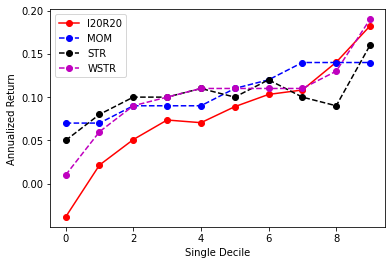

In [23]:
import matplotlib.pyplot as plt
x=range(10)
lines=plt.plot(x,equal_ann,x,mom_r,x,str_r,x,wstr_r)
plt.setp(lines[0],marker='o', linestyle='-',color='r',label='I20R20')
plt.setp(lines[1],marker='o', linestyle='--',color='b',label='MOM')
plt.setp(lines[2],marker='o', linestyle='--',color='k',label='STR')
plt.setp(lines[3],marker='o', linestyle='--',color='m',label='WSTR')

plt.xlabel('Single Decile')
plt.ylabel('Annualized Return')
plt.legend()

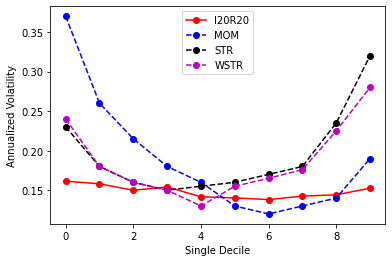

In [54]:
x=range(10)
lines=plt.plot(x,equal_annstd,x,mon_std,x,str_std,x,wstr_std)
plt.setp(lines[0],marker='o', linestyle='-',color='r',label='I20R20')
plt.setp(lines[1],marker='o', linestyle='--',color='b',label='MOM')
plt.setp(lines[2],marker='o', linestyle='--',color='k',label='STR')
plt.setp(lines[3],marker='o', linestyle='--',color='m',label='WSTR')

plt.xlabel('Single Decile')
plt.ylabel('Annualized Volatility')
plt.legend()

In [9]:
import torch
import torch.nn as nn
torch.cuda.empty_cache()
class CNN_20D(nn.Module):

    def __init__(self):
        super(CNN_20D, self).__init__()
        self.cnn_block1 = CNN_Block(in_channels=1, out_channels=64, kernel_size=[5, 3], stride=[3, 1], padding=[7, 1]
                                    , pooling_size=[2, 1], dilation=[2, 1], negative_slope=0.01)
        self.cnn_block2 = CNN_Block(in_channels=64, out_channels=128, kernel_size=[5, 3]
                                    , pooling_size=[2, 1], negative_slope=0.01)
        self.cnn_block3 = CNN_Block(in_channels=128, out_channels=256, kernel_size=[5, 3]
                                    , pooling_size=[2, 1], negative_slope=0.01)
        self.linear = nn.Linear(
            in_features=46080, out_features=2)
        self.Dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.cnn_block1(x)
        x = self.Dropout(x)
        x = self.cnn_block2(x)
        x = self.Dropout(x)
        x = self.cnn_block3(x)
        x = x.view(x.size(0), -1)
        x = self.linear(x)
        # x = F.softmax(x)
        return x

    
    
class CNN_Block(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=[5, 3],stride=1,padding=[2,1],pooling_size=[2,1],dilation=1,negative_slope=0.01):
        super(CNN_Block, self).__init__()
        self.conv = nn.Conv2d(in_channels=in_channels, out_channels=out_channels,
                         kernel_size=kernel_size, stride=stride, padding=padding,dilation=dilation)
        self.max_pooling = nn.MaxPool2d(kernel_size=pooling_size)
        self.LReLU = nn.LeakyReLU(negative_slope)

    def forward(self, x):
        x = self.conv(x)
        x = self.LReLU(x)
        x = self.max_pooling(x)
        return x

In [10]:
import torch

model1=torch.load('model_v1_60.pkl')


In [11]:
from torch.utils.data.dataset import Dataset, ConcatDataset
import torch
import torchvision
import torchvision.transforms as transforms
import pandas as pd
import numpy as np
import os.path as op
test_year=list(range(2000,2020))
test_set=[]
step=500
for year in test_year:
    torch.cuda.empty_cache()
    images = np.memmap(op.join("./img_data/monthly_20d", f"20d_month_has_vb_[20]_ma_{year}_images.dat"), dtype=np.uint8, mode='r').reshape(
                        (-1, 64, 60))
    im_tensor=torch.from_numpy(images)/255
    im_tensor=im_tensor.reshape(len(images),1,64,60)
    print(len(im_tensor))
    up_prob=[]
    for i in range(0,len(im_tensor),step):
        output1=model1(im_tensor[i:i+step].float().cuda())
        for j in range(0,output1.shape[0]):
            up_prob.append(softmax(output1[j].cpu().detach().numpy())[1])
    assert len(up_prob)==len(im_tensor)
    mydataframe=pd.read_feather(op.join("./img_data/monthly_20d", f"20d_month_has_vb_[20]_ma_{year}_labels_w_delay.feather"))[['Date','StockID','Ret_60d','MarketCap']]
    mydataframe.insert(mydataframe.shape[1],'Up_Prob',up_prob)
    test_set.append(mydataframe)

98148
91985
85729
80894
79512
79883
80163
81140
78186
70065
68111
67325
66250
65486
67302
68827
68141
67858
68481
68637


In [12]:
test_data=pd.concat(test_set)
test_data=test_data.dropna(axis=0)
df = test_data.sort_values(by = 'Date')

In [13]:
test_data['Decile']=test_data.groupby('Date')['Up_Prob'].transform(lambda x: pd.qcut(x, 10, labels=False))
df=test_data

In [72]:
newdf = pd.DataFrame(df.groupby(['Date','Decile'])['Ret_60d'].mean())
newdf = newdf.groupby(['Decile']).sum()
equal_ann = newdf['Ret_60d']/year
equal_ann

Decile
0    0.001160
1    0.001641
2    0.001849
3    0.002065
4    0.002064
5    0.002389
6    0.002579
7    0.002516
8    0.002955
9    0.003587
Name: Ret_60d, dtype: float64

In [14]:
newdfs = pd.DataFrame(df.groupby(['Date','Decile'])['Ret_60d'].std())
long=12*20
newdfs = newdfs.groupby(['Decile']).sum()
equal_annstd = newdfs['Ret_60d']/long
equal_annstd


Decile
0    0.250674
1    0.249356
2    0.248701
3    0.258125
4    0.246025
5    0.253513
6    0.255481
7    0.251809
8    0.254395
9    0.251448
Name: Ret_60d, dtype: float64

In [18]:
newdf2 = pd.DataFrame(df.groupby(['Date','Decile']).apply(weightreturn,'Ret_60d','MarketCap'))
newdf2 = newdf2.groupby(['Decile']).sum()
weight_ann = newdf2/year
weight_ann

,0
Decile,
0,0.001676
1,0.001507
2,0.001867
3,0.001708
4,0.001360
5,0.001670
6,0.001853
7,0.001702
8,0.001908


In [21]:
newdf2 = pd.DataFrame(df.groupby(['Date','Decile']).apply(weightreturn,'Ret_60d','MarketCap'))
newdf2 = newdf2.groupby(['Decile']).std()
# weight_ann = newdf2/20
# weight_ann
newdf2*np.sqrt(20)

,0
Decile,
0,0.377766
1,0.388291
2,0.392990
3,0.381606
4,0.385467
5,0.380871
6,0.387423
7,0.370160
8,0.375164
